
# OTA_HotelRatePlanNotifRQ

Analysis is done on basis of 8 files that were processed at 1st of December 2021.


## Import the relevant libraries

In [69]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load all parquet files that were available with that message

In [70]:
HotelRatePlanNotifRQ_Messages = pd.read_parquet("Documents/ota_ugo", engine='auto')
HotelRatePlanNotifRQ_Messages

,HotelRatePlanNotifRQ_Messages
0,[{'MessageMeta': {'X-Correlation-ID': '49c6cb3...
1,[{'MessageMeta': {'X-Correlation-ID': 'c82122e...
2,[{'MessageMeta': {'X-Correlation-ID': 'd826544...
3,[{'MessageMeta': {'X-Correlation-ID': '5afdec3...
4,[{'MessageMeta': {'X-Correlation-ID': '62ad627...
5,[{'MessageMeta': {'X-Correlation-ID': 'd6d8f7d...
6,[{'MessageMeta': {'X-Correlation-ID': 'a4264a1...
7,[{'MessageMeta': {'X-Correlation-ID': '7a4dd52...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [71]:
firstLevel = []
for index, level in HotelRatePlanNotifRQ_Messages.iterrows():
    if index !=2:
        firstLevel.extend(HotelRatePlanNotifRQ_Messages.iloc[index,0])

### Resolving second level of nesting<hr>

In [72]:
secondLevel = []
for level in firstLevel:
    corrID = level["MessageMeta"]["X-Correlation-ID"]
    typ = level["MessageMeta"]["Type"]
    appID = level["MessageMeta"]["AppId"]
    pimID = level["OTA_HotelRatePlanNotifRQ"]["PrimaryLangID"]
    token = level["OTA_HotelRatePlanNotifRQ"]["EchoToken"]
    timestamp = level["OTA_HotelRatePlanNotifRQ"]["TimeStamp"]
    version = level["OTA_HotelRatePlanNotifRQ"]["Version"]
    target = level["OTA_HotelRatePlanNotifRQ"]["Target"]
    hotel = level["OTA_HotelRatePlanNotifRQ"]["RatePlans"]["HotelCode"]
    chain = level["OTA_HotelRatePlanNotifRQ"]["RatePlans"]["ChainCode"]
    hotelName = level["OTA_HotelRatePlanNotifRQ"]["RatePlans"]["HotelName"]
    tpa = level["OTA_HotelRatePlanNotifRQ"]["TPA_Extensions"]
    data_row = level["OTA_HotelRatePlanNotifRQ"]["RatePlans"]["RatePlan"]
    for row in data_row:
        row["X-Correlation-ID"] = corrID
        row["Type"] = typ
        row["AppId"] = appID
        row["PrimaryLangID"] = pimID
        row["EchoToken"] = token
        row["TimeStamp"] = timestamp
        row["Version"] = version
        row["Target"] = target
        row["HotelCode"] = hotel
        row["ChainCode"] = chain
        row["HotelName"] = hotelName
        row["TPA_Extensions"] = tpa
        secondLevel.append(row)

### Resolving third level of nesting<hr>

In [73]:
thirdLevel = []
for level in secondLevel:
    curr = level["CurrencyCode"]
    ratePlanID = level["RatePlanID"]
    rpCode = level["RatePlanCode"]
    rpType = level["RatePlanType"]
    rpNotType = level["RatePlanNotifType"]
    rpStatusType = level["RatePlanStatusType"]
    start = level["Start"]
    end = level["End"]
    baseOcc = level["BaseOccupancy"] 
    corrID = level["X-Correlation-ID"]
    typ = level["Type"]
    appID = level["AppId"]
    pimID = level["PrimaryLangID"]
    token = level["EchoToken"]
    timestamp = level["TimeStamp"]
    version = level["Version"]
    target = level["Target"]
    hotel = level["HotelCode"]
    chain = level["ChainCode"]
    hotelName = level["HotelName"]
    bookingRules = level["BookingRules"]
    sell = level["SellableProducts"]
    desc = level["Description"]
    feeLevel = level["RatePlanLevelFee"]
    originalData = level["OriginalData"]
    data_row = level["Rates"]["Rate"]
    for row in data_row:
        row["CurrencyCode"] = curr
        row["RatePlanID"] = ratePlanID
        row["RatePlanCode"] = rpCode  
        row["RatePlanType"] = rpType
        row["RatePlanNotifType"] = rpNotType
        row["RatePlanStatusType"] = rpStatusType
        row["Start"] = start
        row["End"] = end 
        row["BaseOccupancy"] = baseOcc
        row["X-Correlation-ID"] = corrID
        row["Type"] = typ
        row["AppId"] = appID
        row["PrimaryLangID"] = pimID
        row["EchoToken"] = token
        row["TimeStamp"] = timestamp
        row["Version"] = version
        row["Target"] = target
        row["HotelCode"] = hotel
        row["ChainCode"] = chain
        row["HotelName"] = hotelName
        row["BookingRules"] = bookingRules
        row["SellableProducts"] = sell
        row["Description"] = desc
        row["RatePlanLevelFee"] = feeLevel
        row["OriginalData"] = originalData
        thirdLevel.append(row)

### Final - base to create DataFrame <hr>

In [74]:
final = []

for level in thirdLevel:
    data_row = level["BaseByGuestAmts"]['BaseByGuestAmt']
    ddGuesAamount = level["AdditionalGuestAmounts"]
    cancelPolicy = level["CancelPolicies"]
    paymentPolicy = level["PaymentPolicies"]
    MealsPolicy =  level["MealsIncluded"]
    fees = level["Fees"]
    GuaranteePolicies = level["GuaranteePolicies"]
    RateDescription = level["RateDescription"]
    NumberOfUnits = level["NumberOfUnits"]        
    start = level["Start"]
    end = level["End"]
    mon = level["Mon"]
    tue = level["Tue"]
    wed = level["Weds"]
    thur = level["Thur"]
    fri = level["Fri"]
    sat = level["Sat"]
    sun = level["Sun"]
    invTypeCode = level["InvTypeCode"]
    invCode = level["InvCode"]
    maxLos = level["MaxLOS"]
    minLOS = level["MinLOS"]
    rate = level["RateTimeUnit"]
    status = level["Status"]
    currCode = level['CurrencyCode']
    unit = level["UnitMultiplier"]
    res = level["Restrictions"]
    length = level["LengthOfStay"]
    stray = level["StayOfThrough"]
    booking = level["AdvancedBooking"]
    orData = level["OriginalData"]
    ratePlanID = level["RatePlanID"]
    rpCode = level["RatePlanCode"]
    rpType = level["RatePlanType"]
    rpNotType = level["RatePlanNotifType"]
    rpStatusType = level["RatePlanStatusType"]
    ss = level["Start"]
    ee = level["End"]
    baseOcc = level["BaseOccupancy"] 
    corrID = level["X-Correlation-ID"]
    typ = level["Type"]
    appID = level["AppId"]
    pimID = level["PrimaryLangID"]
    token = level["EchoToken"]
    timestamp = level["TimeStamp"]
    version = level["Version"]
    target = level["Target"]
    hotel = level["HotelCode"]
    chain = level["ChainCode"]
    hotelName = level["HotelName"]
    bookingRules = level["BookingRules"]
    sell = level["SellableProducts"]
    desc = level["Description"]
    feeLevel = level["RatePlanLevelFee"]
    for row in data_row:
        row["Start"] = start
        row["End"] = end
        row["Mon"] = mon
        row["Tue"] = tue
        row["Weds"] = wed
        row["Thur"] = thur
        row["Fri"] = fri
        row["Sat"] = sat
        row["Sun"] = sun
        row["Start"] = ss
        row["End"] = ee
        row["X-Correlation-ID"] = corrID
        row["Type"] = typ
        row["AppId"] = appID
        row["PrimaryLangID"] = pimID
        row["EchoToken"] = token
        row["TimeStamp"] = timestamp
        row["Version"] = version
        row["Target"] = target
        row["ChainCode"] = chain
        row["HotelName"] = hotelName
        row["CurrencyCode"] = curr
        row["RatePlanCode"] = rpCode
        row["RatePlanType"] = rpType
        row["RatePlanNotifType"] = rpNotType
        row["RatePlanStatusType"] = rpStatusType
        row["BaseOccupancy"] = baseOcc
        row["HotelCode"] = hotel
        row["RatePlanID"] = ratePlanID
        row["AdditionalGuestAmounts"] = ddGuesAamount
        row["CancelPolicies"] = cancelPolicy
        row["PaymentPolicies"] = paymentPolicy
        row["MealsIncluded"] = MealsPolicy
        row["Fees"] = fees
        row["GuaranteePolicies"] = GuaranteePolicies
        row["RateDescription"] = RateDescription 
        row["NumberOfUnits"] = NumberOfUnits
        row["InvTypeCode"] = invTypeCode
        row["InvCode"] = invCode
        row["MaxLOS"] = maxLos
        row["MinLOS"] = minLOS
        row["RateTimeUnit"] = rate
        row["Status"] = status
        row['CurrencyCode'] = currCode
        row["UnitMultiplier"] = unit
        row["Restrictions"] = res 
        row["LengthOfStay"] = length
        row["StayOfThrough"] = stray 
        row["AdvancedBooking"] = booking
        row["OriginalData"] = orData
        row["BookingRules"] = bookingRules
        row["SellableProducts"] = sell 
        row["Description"] = desc
        row["RatePlanLevelFee"] = feeLevel       
        final.append(row)

### Creating DataFrame<hr>

In [75]:
finalData_raw = pd.DataFrame(final)
HotelRatePlanNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [76]:
HotelRatePlanNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NumberOfGuests          3153 non-null   object
 1   AgeQualifyingCode       3153 non-null   object
 2   AmountAfterTax          3153 non-null   object
 3   AmountBeforeTax         3153 non-null   object
 4   DecimalPlaces           0 non-null      object
 5   CurrencyCode            3144 non-null   object
 6   Start                   0 non-null      object
 7   End                     0 non-null      object
 8   Mon                     9 non-null      object
 9   Tue                     9 non-null      object
 10  Weds                    9 non-null      object
 11  Thur                    9 non-null      object
 12  Fri                     9 non-null      object
 13  Sat                     9 non-null      object
 14  Sun                     9 non-null      object
 15  X-Co

In [77]:
HotelRatePlanNotifRQ.head(10)

,NumberOfGuests,AgeQualifyingCode,AmountAfterTax,AmountBeforeTax,DecimalPlaces,CurrencyCode,Start,End,Mon,Tue,...,UnitMultiplier,Restrictions,LengthOfStay,StayOfThrough,AdvancedBooking,OriginalData,BookingRules,SellableProducts,Description,RatePlanLevelFee
0,1,10,189.0,189.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
1,2,10,189.0,189.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
2,1,10,312.0,312.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
3,2,10,312.0,312.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
4,1,10,312.0,312.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
5,2,10,312.0,312.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
6,1,10,768.0,768.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
7,2,10,768.0,768.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
8,1,10,313.0,313.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None
9,2,10,313.0,313.0,None,CNY,None,None,None,None,...,1,None,None,None,None,,None,None,None,None


### Basic statistic for data<hr>

In [78]:
HotelRatePlanNotifRQ.describe().transpose()

,count,unique,top,freq
NumberOfGuests,3153,2,1,1578
AgeQualifyingCode,3153,2,10,3150
AmountAfterTax,3153,139,749.0,374
AmountBeforeTax,3153,139,749.0,374
DecimalPlaces,0,0,NaN,NaN
CurrencyCode,3144,1,CNY,3144
Start,0,0,NaN,NaN
End,0,0,NaN,NaN
Mon,9,1,true,9
Tue,9,1,false,9


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [79]:
HotelRatePlanNotifRQ = HotelRatePlanNotifRQ.drop(columns=["DecimalPlaces","AdvancedBooking","StayOfThrough","LengthOfStay","Restrictions","RateTimeUnit","MinLOS","MaxLOS","RateDescription","GuaranteePolicies",
                     "Fees","MealsIncluded","PaymentPolicies","CancelPolicies","AdditionalGuestAmounts","BaseOccupancy","End","Start","RatePlanStatusType","RatePlanType", 
                     "RatePlanCode","HotelName","DecimalPlaces","PrimaryLangID", "BookingRules", "SellableProducts","Description","RatePlanLevelFee","EchoToken", "TimeStamp",
                      "Version","Target"])

In [80]:
HotelRatePlanNotifRQ.describe().transpose()

,count,unique,top,freq
NumberOfGuests,3153,2,1,1578
AgeQualifyingCode,3153,2,10,3150
AmountAfterTax,3153,139,749.0,374
AmountBeforeTax,3153,139,749.0,374
CurrencyCode,3144,1,CNY,3144
Mon,9,1,true,9
Tue,9,1,false,9
Weds,9,1,false,9
Thur,9,2,false,6
Fri,9,2,false,6


#### Checking null values for hotelCode

In [81]:
HotelRatePlanNotifRQ.HotelCode.isna().sum()

0

#### Checking unique values for hotelCode

In [82]:
HotelRatePlanNotifRQ.HotelCode.unique()

array(['GRT130002', 'GRT003014', '62942'], dtype=object)

#### Creating sub DataFrames for each hotel 

In [83]:
GRT130002 = HotelRatePlanNotifRQ.loc[HotelRatePlanNotifRQ.HotelCode=='GRT130002']
GRT003014 = HotelRatePlanNotifRQ.loc[HotelRatePlanNotifRQ.HotelCode=='GRT003014']
hotel62942 = HotelRatePlanNotifRQ.loc[HotelRatePlanNotifRQ.HotelCode=='62942']

#### Base statistics for each hotel

In [84]:
GRT130002.describe().transpose()

,count,unique,top,freq
NumberOfGuests,1400,2,1,700
AgeQualifyingCode,1400,1,10,1400
AmountAfterTax,1400,72,379.0,198
AmountBeforeTax,1400,72,379.0,198
CurrencyCode,1400,1,CNY,1400
Mon,0,0,NaN,NaN
Tue,0,0,NaN,NaN
Weds,0,0,NaN,NaN
Thur,0,0,NaN,NaN
Fri,0,0,NaN,NaN


In [85]:
GRT003014.describe().transpose()

,count,unique,top,freq
NumberOfGuests,1744,2,1,872
AgeQualifyingCode,1744,1,10,1744
AmountAfterTax,1744,64,749.0,374
AmountBeforeTax,1744,64,749.0,374
CurrencyCode,1744,1,CNY,1744
Mon,0,0,NaN,NaN
Tue,0,0,NaN,NaN
Weds,0,0,NaN,NaN
Thur,0,0,NaN,NaN
Fri,0,0,NaN,NaN


In [86]:
hotel62942.describe().transpose()

,count,unique,top,freq
NumberOfGuests,9,2,1,6
AgeQualifyingCode,9,2,10,6
AmountAfterTax,9,4,210,3
AmountBeforeTax,9,4,210,3
CurrencyCode,0,0,NaN,NaN
Mon,9,1,true,9
Tue,9,1,false,9
Weds,9,1,false,9
Thur,9,2,false,6
Fri,9,2,false,6


#### Checking null values for NumberofGuests

In [87]:
HotelRatePlanNotifRQ.NumberOfGuests.isna().sum()

0

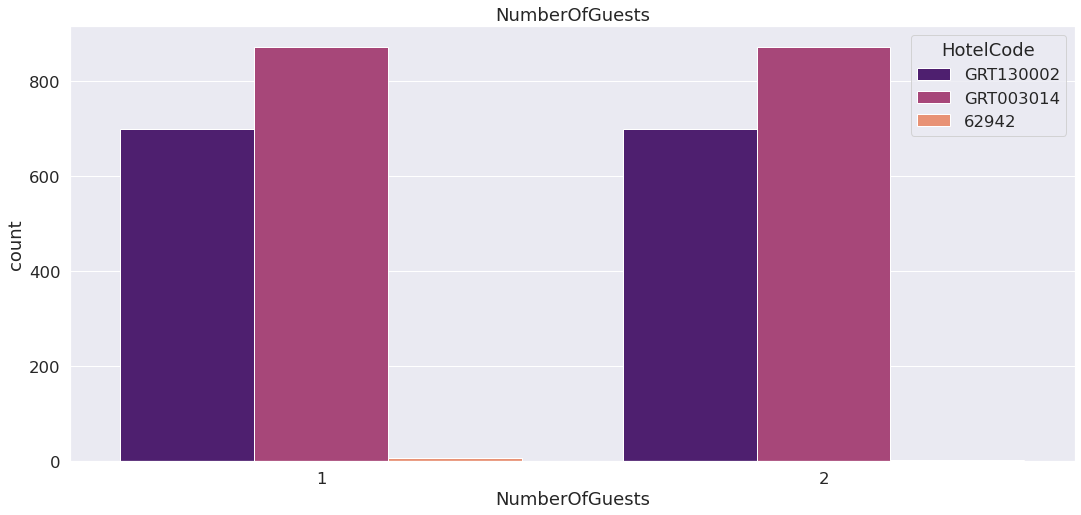

In [93]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.NumberOfGuests, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('NumberOfGuests')
plt.show()

#### Checking for null values for AgeQualifyingCode column

In [95]:
HotelRatePlanNotifRQ.AgeQualifyingCode.isna().sum()

0

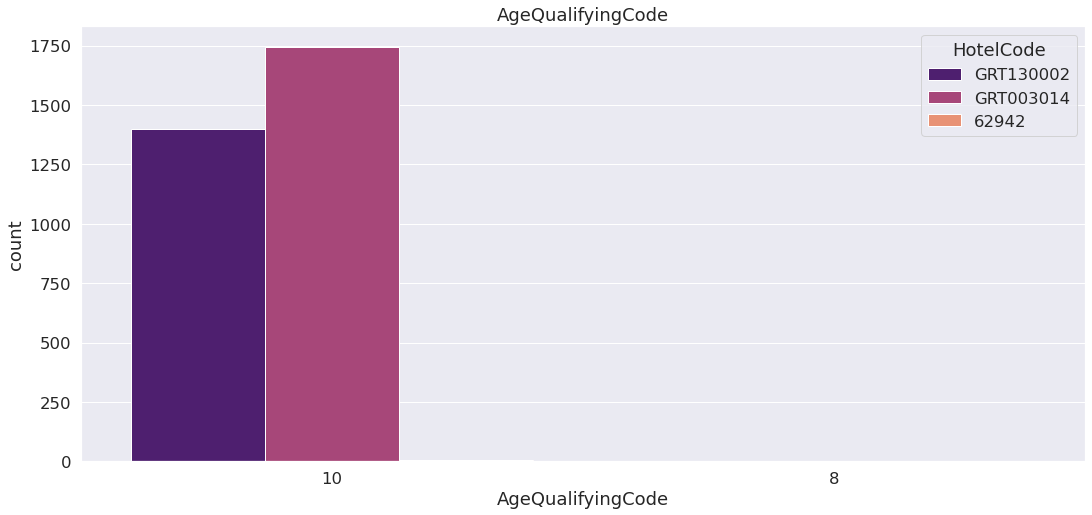

In [96]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.AgeQualifyingCode, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('AgeQualifyingCode')
plt.show()

#### Checking against null values for AmountAfterTax

In [97]:
HotelRatePlanNotifRQ.AmountAfterTax.isna().sum()

0

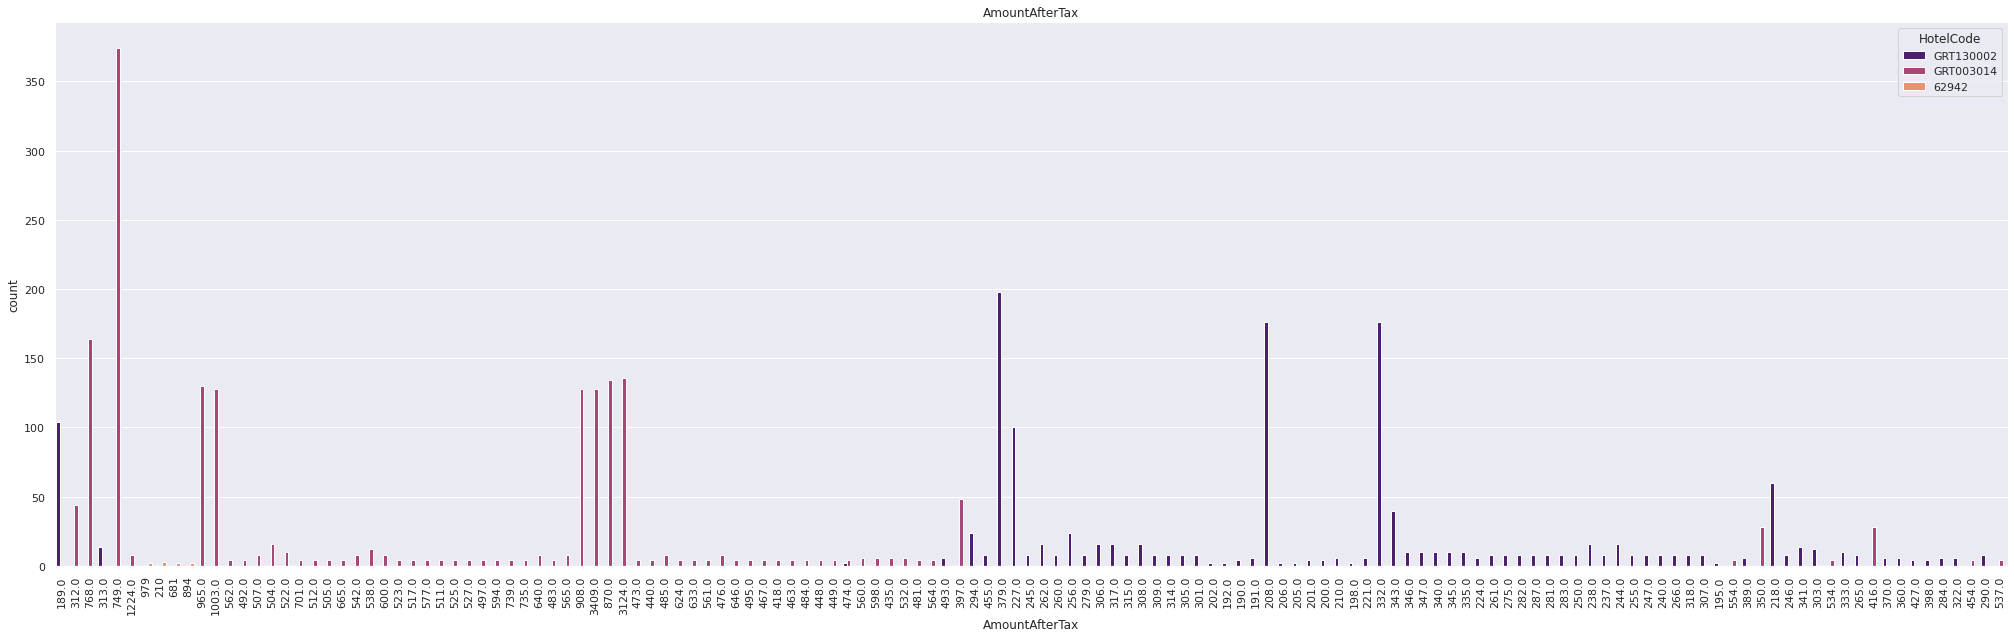

In [108]:
plt.figure(figsize=(35,10))
sns.set(font_scale = 1)
sns.countplot(x = HotelRatePlanNotifRQ.AmountAfterTax, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.xticks(rotation=90)
plt.title('AmountAfterTax')
plt.show()

#### Checking against null values for AmountBeforeTax

In [109]:
HotelRatePlanNotifRQ.AmountBeforeTax.isna().sum()

0

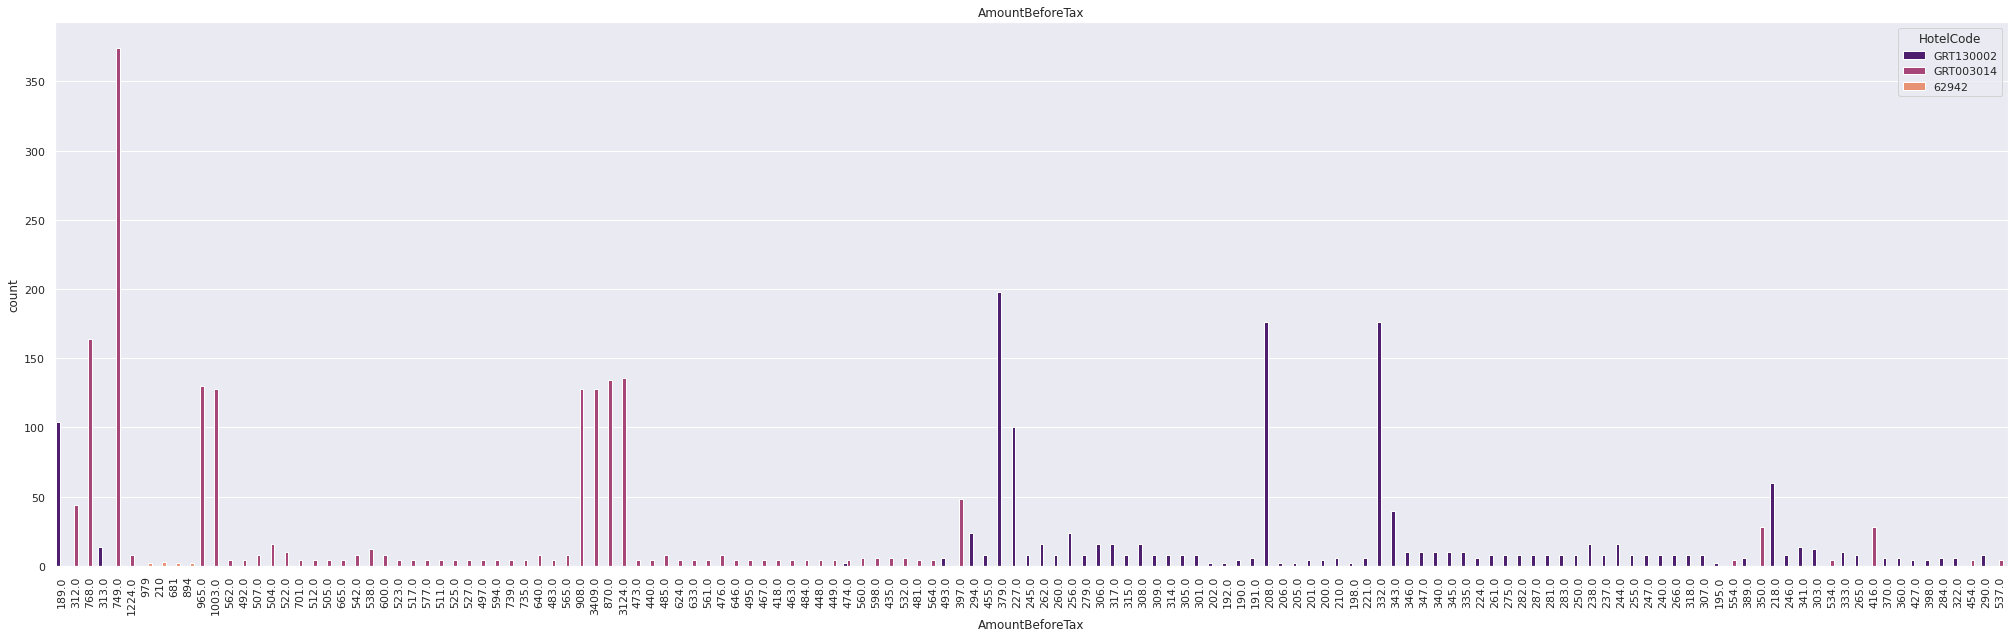

In [111]:
plt.figure(figsize=(35,10))
sns.set(font_scale = 1)
sns.countplot(x = HotelRatePlanNotifRQ.AmountBeforeTax, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.xticks(rotation=90)
plt.title('AmountBeforeTax')
plt.show()

#### Checking against null values for RatePlanID

In [112]:
HotelRatePlanNotifRQ.RatePlanID.isna().sum()

0

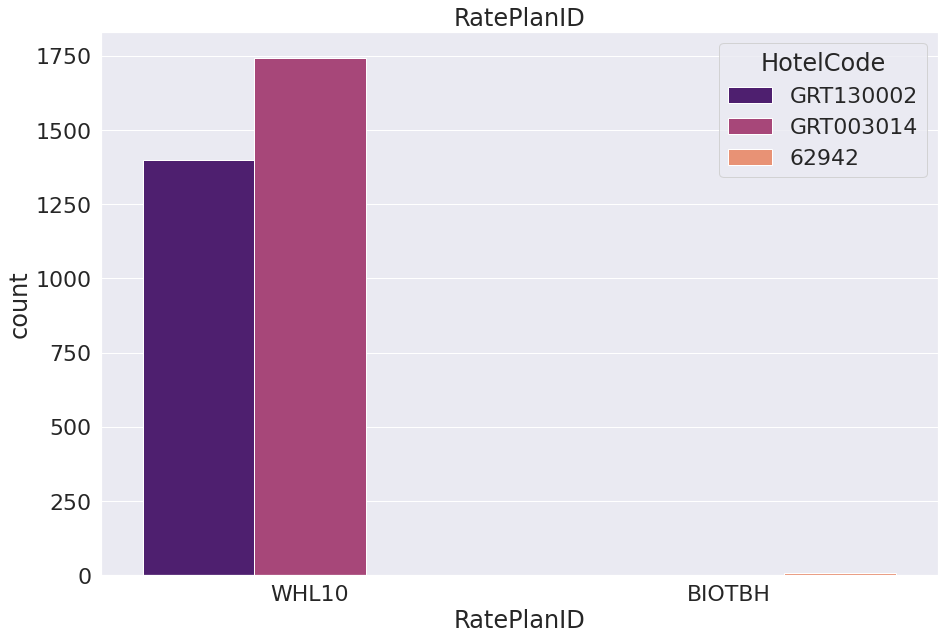

In [120]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
sns.countplot(x = HotelRatePlanNotifRQ.RatePlanID, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('RatePlanID')
plt.show()

#### Checking against null values for InvTypeCode

In [116]:
HotelRatePlanNotifRQ.InvTypeCode.isna().sum()

3144

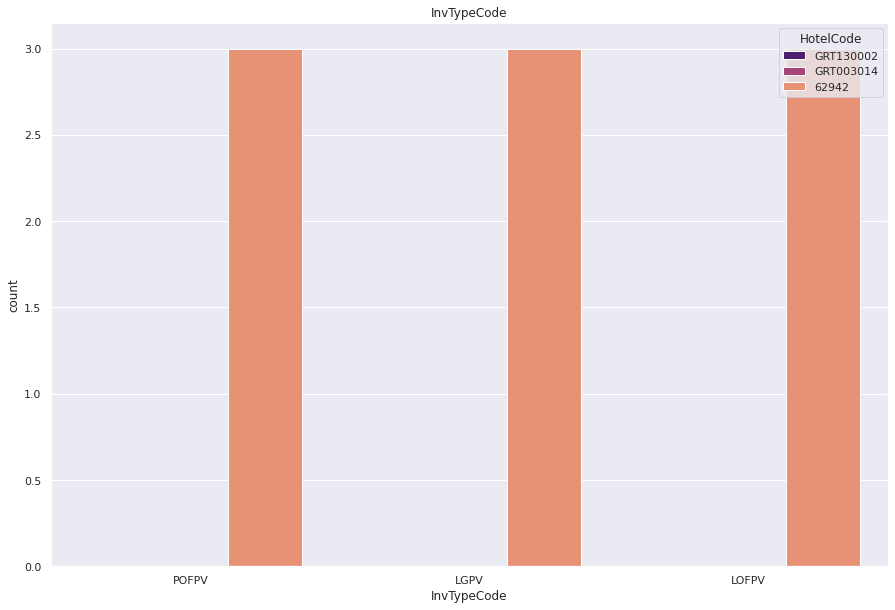

In [121]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
sns.countplot(x = HotelRatePlanNotifRQ.InvTypeCode, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('InvTypeCode')
plt.show()

#### Checking against null values forInvCode

In [123]:
HotelRatePlanNotifRQ.InvCode.isna().sum()

9

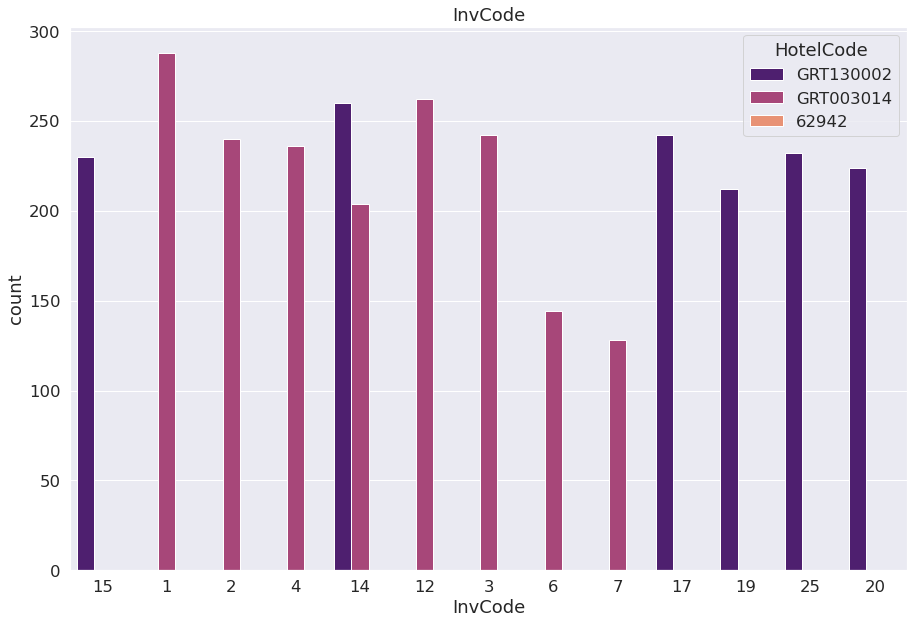

In [140]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.InvCode, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('InvCode')
plt.show()

#### Checking against null values for CurrencyCode

In [126]:
HotelRatePlanNotifRQ.CurrencyCode.isna().sum()

9

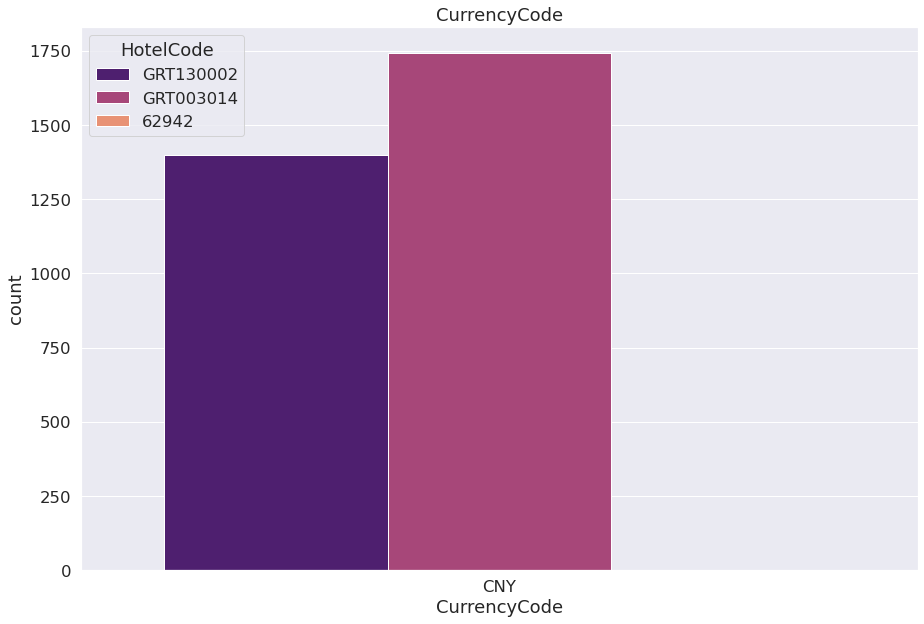

In [139]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.CurrencyCode, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('CurrencyCode')
plt.show()

#### Checking against null values for AppId

In [129]:
HotelRatePlanNotifRQ.AppId.isna().sum()

0

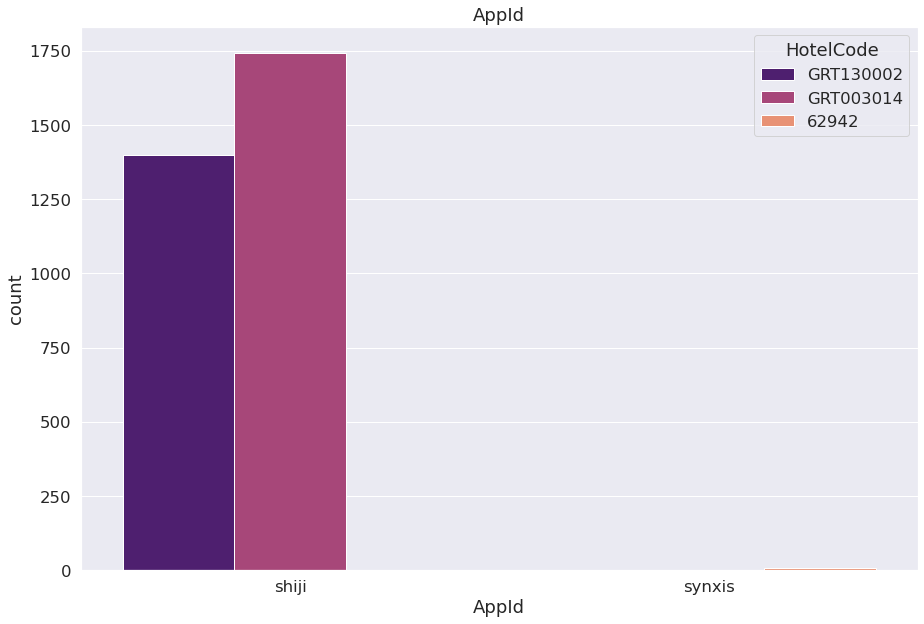

In [138]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.AppId, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('AppId')
plt.show()

#### Checking against null values for X-Correlation-ID

In [135]:
HotelRatePlanNotifRQ["UnitMultiplier"].isna().sum()

9

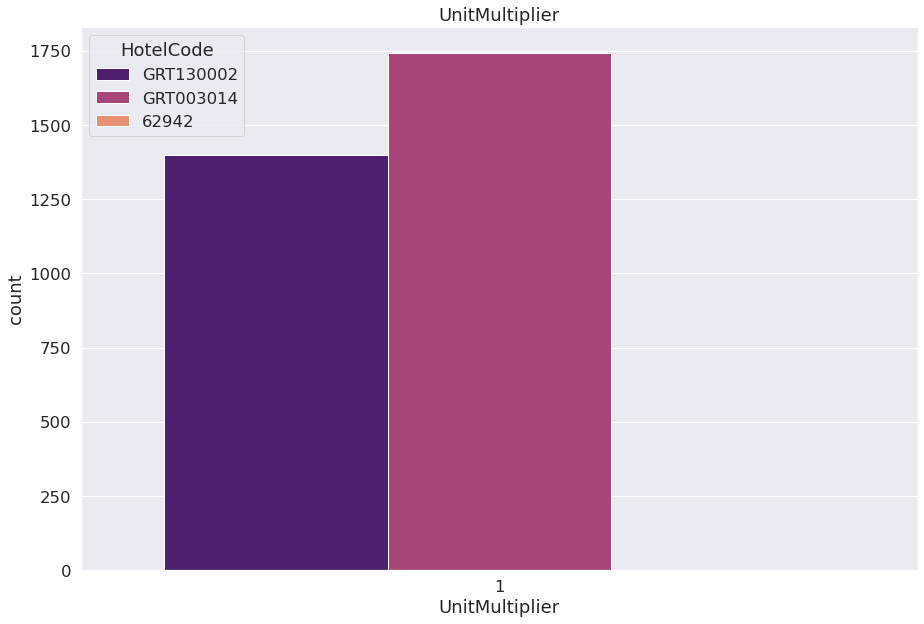

In [137]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ["UnitMultiplier"], hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('UnitMultiplier')
plt.show()